<a href="https://colab.research.google.com/github/mpfoster/Biochem5721/blob/master/Plot_CSP_from_ppm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# specify location and names of xpk files
fname0 = 'ppm1.txt'
fname1 = 'ppm2.txt'

dcol = 0,1 # nvj ppm.out files have atom in col 0, shift in col 1

atom_label_1 = "H"
atom_label_2 = "N"

import pandas as pd
import matplotlib.pyplot as plt


def read_ppm(fname, dcol): # function to read asg file
    #read nmrviewJ ppm.out file; dcol is the column nums to use; returns pandas dataframe
    df = pd.read_table(fname, header=None, sep=r'[{}\s+]', engine='python',
                   names=['atom', 'shift_'+fname],
                   usecols=dcol) # 0,1 for ppm.out files
    df['resi'] = df.atom.str.split(".", expand=True)[0]
    df['name'] = df.atom.str.split(".", expand=True)[1]
    return df

def get_csp(d1_0, d1_1, d2_0, d2_1, factor): # function to compute CSP; factor is scaling for D2
    return 0.5*((d1_0-d1_1)**2+((d2_0-d2_1)/factor)**2)**0.5



fname = fname0
df = read_ppm(fname, dcol)
df1 = df[['atom','resi','name', 'shift_'+fname]]
fname = fname1
df = read_ppm(fname, dcol)
df2 = df[['atom','resi','name', "shift_"+fname]]
df = df1.merge(df2, how='inner', on='atom')
df['diff'] = df1["shift_"+fname0]-df2["shift_"+fname1]
df[df['name_x']=='H']


,atom,resi_x,name_x,shift_ppm1.txt,resi_y,name_y,shift_ppm2.txt,diff
6,1.H,1,H,7.0,1,H,7.1,-0.1
8,2.H,2,H,8.0,2,H,7.9,0.1


/content/cdk2_noC2_list.xpk header: (2, ['HN', 'N'], ['Mg+cdk2-ATP_1to10.nv'], '4530.69 2756.34', '800.13375892 81.08607635')
/content/cdk2_C2_3to1_list.xpk header: (2, ['HN', 'N'], ['Mg+cdk2-ATP_1to10.nv'], '4530.69 2756.34', '800.13375892 81.08607635')


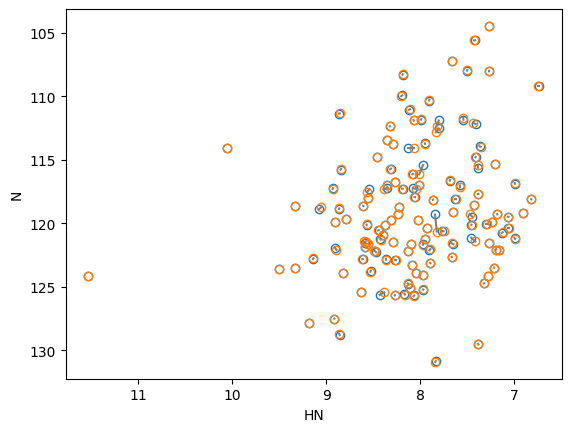

ybase, ymax, ynorm: 0.0 0.1347461222484703 1.0


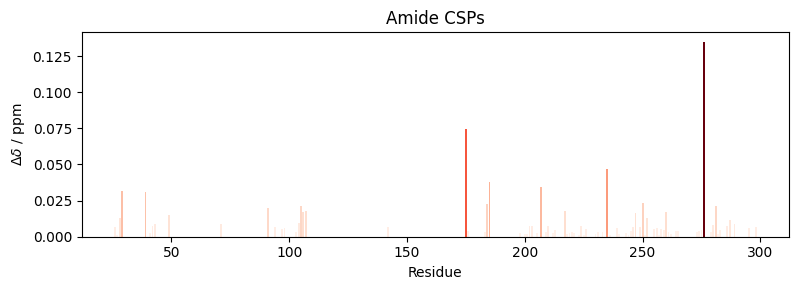

In [ ]:
# Python script to compare two nmrview ppm.out files and plot differences
# particularly, for chemical shift perturbation analysis
# reads two text files with assignments in the format:
# resi.name shift flag
# MPF 2024-01-10

# specify location and names of xpk files
fname0 = '/content/ppm1.txt'
fname1 = '/content/ppm2.txt'

# satoms for CSP calculation
atom_labels = 'H','N'

# scaling factor for D2;  5 if d2 is 15N and d1 is 1H; 2 if 13C
factor_HN = 5
factor_HC = 2

#ylimit = None # the y limits of the plot; if none, data max
ylimit = None
ybase = 0.0 # min y value for color ramp calculation
ynorm = 1.0 # value for normalization of color ramp.

# plot attributes
xlabel = 'Residue'
ylabel = u'$\Delta \delta$ / ppm'
ptitle = 'CSP' # change this for your data
colormap = 'Reds' # color map for bar chart
# see https://matplotlib.org/stable/gallery/color/colormap_reference.html

plotwidth = 8
plotheight = 3
xy_plotfile = None
# xy_plotfile = 'xy_plot.pdf' # supported extensions, pdf, svg, png
csp_plotfile = None
# csp_plotfile = 'csp_plot.pdf' # supported extensions, pdf, svg, png
connectlines = 'Grey' # specify connecting line color or leave blank

# --- Should not need to modify anything after this ---

# required libraries
import pandas as pd
import re # regular expression
import matplotlib.pyplot as plt

# ppm.out format is
# resi.name shift flag

def read_ppm(fname, dcol): # function to read asg file
    #read nmrviewJ ppm.out file; dcol is the column nums to use; returns pandas dataframe
    df = pd.read_table(fname, header=None, sep=r'[\s+]', engine='python',
                   names=["atom", fname+"shift"],
                   usecols=dcol) # 0,1 for ppm.out files
    df['resi']= df.atom.str.split(".", expand=True)[0]
    df['name']=df.atom.str.split(".", expand=True)[1]
    return df

def get_csp(d1_0, d1_1, d2_0, d2_1, factor): # function to compute CSP; factor is scaling for D2
    return 0.5*((d1_0-d1_1)**2+((d2_0-d2_1)/factor)**2)**0.5

# load both data into dataframes
dcol = 0,1
df0 = read_ppm(fname0, dcol)
df1 = read_ppm(fname1, dcol)

# merge first and second df by atom, and keep data in dcol
df2 = df0.merge(df1, how='inner', on='atom') # resulting df has _x and _y data columns


# make overlay plot of xy values
plt.plot(df2[label[0]+'_ppm_x'], df2[label[1]+'_ppm_x'], 'o', fillstyle='none')
plt.plot(df2[label[0]+'_ppm_y'], df2[label[1]+'_ppm_y'], 'o', fillstyle='none')

# Plot connecting lines
# ref: https://datavizpyr.com/connect-paired-points-with-lines-scatter-plot-matplotlib/
if connectlines:
  xcoords = df2.HN_ppm_x,df2.HN_ppm_y # 2D array of xvals
  ycoords = df2.N_ppm_x,df2.N_ppm_y # 2D array of xvals
  plt.plot(xcoords,ycoords, '-', color=connectlines) #

# ppm increases to the left
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel(label[0]); plt.ylabel(label[1])

if xy_plotfile:
  plt.savefig(xy_plotfile)

plt.show()

# compute CSP:
df2['csp'] = get_csp(df2[label[0]+'_ppm_x'],df2[label[0]+'_ppm_y'], df2[label[1]+'_ppm_x'], df2[label[1]+'_ppm_y'], factor)
df2.to_csv('difference.csv', index=False) # write csv file

# plot it
fig, ax = plt.subplots(figsize=(plotwidth, plotheight), tight_layout=True)
cmap = plt.get_cmap(colormap)
xval = df2.resi
yval = df2.csp
ymax = df2.csp.max()
print("ybase, ymax, ynorm:", ybase, ymax, ynorm)
def rescale_cmap(cmap, yval,ybase,ymax,ynorm): # rescale y values for color map
    return cmap((yval-ybase)/(ymax/ynorm))

plt.bar(xval, yval,
        color = rescale_cmap(cmap, yval, ybase, ymax, ynorm)
        )

plt.xlabel(xlabel); plt.ylabel(ylabel); plt.title(ptitle)
if ylimit is not None:
    plt.ylim(top=ylimit)

if csp_plotfile is not None: # optional save plot
    plt.savefig(csp_plotfile)
    # other options: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
